**Demo: Polynomial Model Order Selection**

This demo illustrates the process of cross-validation for model order selection based on polynomial fitting using synthetic data.

Loading packages

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing

We consider a polynomial model with polynomial degree d and generate synthetic data based on this model.

In [2]:
import numpy.polynomial.polynomial as poly

#beta, wstd and dtrue are coefficients, noise and polynomial degree respectively
beta =np.array([1,0.5,0,2])
wstd = 0.4
dtrue = len(beta)-1

#Generating data
nsamp = 100
xdat = np.random.uniform(-1, 1, nsamp)

#True function incorporating noise
y0 = poly.polyval(xdat, beta)
ydat = y0 + np.random.normal(0, wstd, nsamp)

Plotting the data

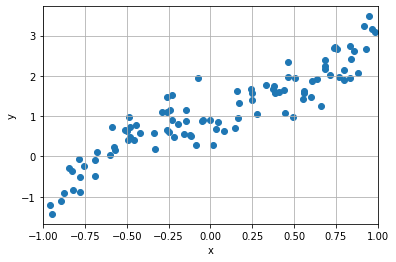

In [3]:
plt.scatter(xdat,ydat)
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Plotting true relation on top of scatter plot

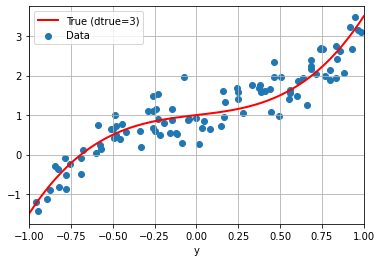

In [4]:
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp, beta)
plt.xlim(-1,1)
plt.plot(xp,yp,'r-',linewidth=2.0)

plt.scatter(xdat,ydat)
plt.xlim([-1,1])
plt.xlabel('x')
plt.xlabel('y')
plt.grid()
plt.legend(['True (dtrue=3)', 'Data'], loc='upper left')
plt.show()

Text(0, 0.5, 'y')

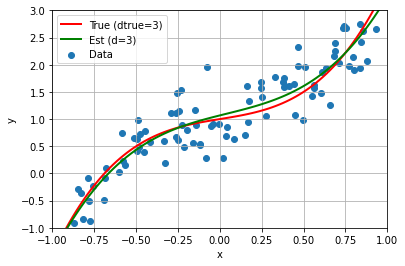

In [5]:
d = 3
beta_hat = poly.polyfit(xdat,ydat,d)

# Plot true and estimated function
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)
plt.xlim(-1,1)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=2)
plt.plot(xp,yp_hat,'g-',linewidth=2)

# Plot data
plt.scatter(xdat,ydat)
plt.legend(['True (dtrue=3)', 'Est (d=3)', 'Data'], loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

Underfitting

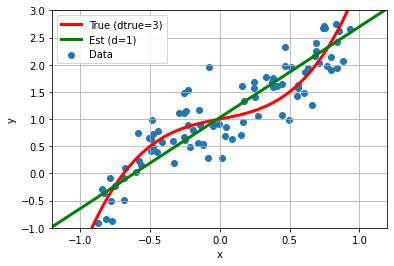

In [6]:
d = 1
beta_hat = poly.polyfit(xdat,ydat,d)

# Plot true and estimated function
xp = np.linspace(-1.2,1.2,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)
plt.xlim(-1,1)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=3)
plt.plot(xp,yp_hat,'g-',linewidth=3)

# Plot data
plt.scatter(xdat,ydat)
plt.legend(['True (dtrue=3)', 'Est (d=1)', 'Data'],loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1.2,1.2])
plt.show()

Overfitting

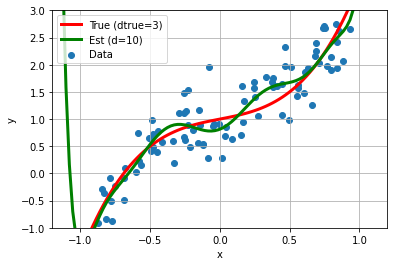

In [7]:
d = 10
beta_hat = poly.polyfit(xdat,ydat,d)

# Plot true and estimated function
xp = np.linspace(-1.2,1.2,100)
yp = poly.polyval(xp,beta)
yp_hat = poly.polyval(xp,beta_hat)
plt.xlim(-1.2,1.2)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=3)
plt.plot(xp,yp_hat,'g-',linewidth=3)

# Plot data
plt.scatter(xdat,ydat)
plt.legend(['True (dtrue=3)', 'Est (d=10)', 'Data'],loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1.2,1.2])
plt.show()

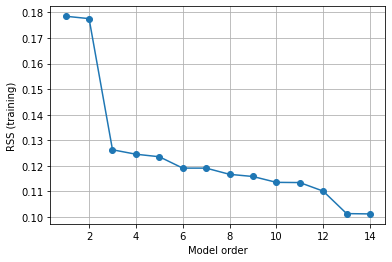

In [8]:
dtest = np.array(range(1,15))
RSStr = []
for d in dtest:
    
    # Fit data
    beta_hat = poly.polyfit(xdat,ydat,d)
    
    # Measure RSS on training data
    yhat = poly.polyval(xdat,beta_hat)
    RSSd = np.mean((yhat-ydat)**2)
    RSStr.append(RSSd)
    
plt.plot(dtest,RSStr,'o-')
plt.xlabel('Model order')
plt.ylabel('RSS (training)')
plt.grid()

In class exercise

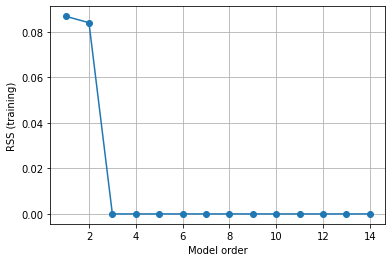

In [9]:
xnew = np.random.uniform(-1,1,100)
ynew = poly.polyval(xnew,beta)

dtest = np.array(range(1,15))
RSStr_new = []
for d in dtest:
    
    # Fit data
    beta_hat = poly.polyfit(xnew,ynew,d)
    
    # Measure RSS on training data
    yhat = poly.polyval(xnew,beta_hat)
    RSSd = np.mean((yhat-ynew)**2)
    RSStr_new.append(RSSd)

plt.plot(dtest,RSStr_new,'o-')
plt.xlabel('Model order')
plt.ylabel('RSS (training)')
plt.grid()


**Visualizing Bias & Variance**

Bias at any test point x is given as,

*   Bias(x) = f0(x) - E( f(x,beta) ) = true function - avg. estimated function   





In [10]:
ntrial = 100
dtest = [1,3,14]
nd = len(dtest)

nplot = 30
xp = np.linspace(-1,1,nplot)
yp = poly.polyval(xp,beta)
noise = np.random.normal(0, wstd,nsamp)

yp_hat_mean = np.zeros((nplot,nd))
yp_hat_std = np.zeros((nplot,nd))

for j, d in enumerate(dtest):

  yp_hat = np.zeros((nplot,ntrial))

  for it in range(ntrial):

    ydati =y0 + noise

    beta_hat = poly.polyfit(xdat,ydati,d)
    yp_hat[:,it] = poly.polyval(xp, beta_hat)

  yp_hat_mean[:,j] = np.mean(yp_hat, axis=1)
  yp_hat_std[:,j] = np.std(yp_hat, axis=1)

Plotting the Average estimated function and true function

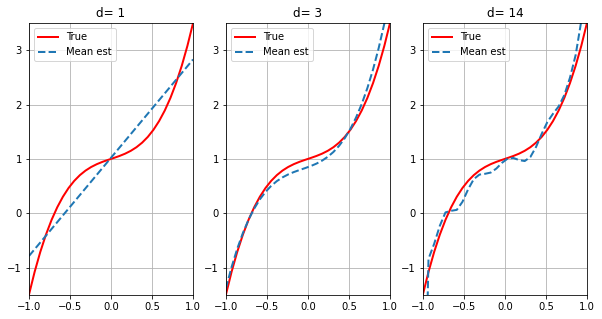

In [11]:
plt.figure(figsize=(10,5))
for j, d in enumerate(dtest):
    
    # Plot the fit
    plt.subplot(1,nd,j+1)
    plt.xlim(-1,1)
    plt.ylim(-1.5,3.5)    
    plt.plot(xp,yp,'r-',linewidth=2)     
    plt.plot(xp,yp_hat_mean[:,j], '--', linewidth=2)
    plt.title('d= %d' % d)
    plt.grid()
    plt.legend(['True',  'Mean est'], loc='upper left')

Variance is given as 

*   Var(x) = E( f(x,beta) - E( f(x,beta) ) )^2 

Plotting Variance


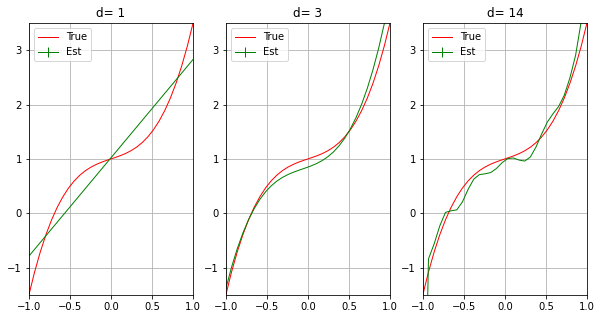

In [12]:
plt.figure(figsize=(10,5))
for j, d in enumerate(dtest):
    
    # Plot the fit
    plt.subplot(1,nd,j+1)
    plt.xlim(-1,1)
    plt.ylim(-1.5,3.5)    
    plt.plot(xp,yp,'r-',linewidth=1)     
    plt.errorbar(xp,yp_hat_mean[:,j],fmt='g-',yerr=yp_hat_std[:,j],linewidth=1)
    plt.title('d= %d' % d)
    plt.grid()
    plt.legend(['True',  'Est'], loc='upper left')

**Using Cross Validation**

This method is used to evaluate model error including both bias and variance, therefore model samples have to be split into training and test samples.

In [13]:
ntr = nsamp // 2
nts = nsamp - ntr

# Training
xtr = xdat[:ntr]
ytr = ydat[:ntr]

# Test
xts = xdat[ntr:]
yts = ydat[ntr:]

Plotting training and test samples

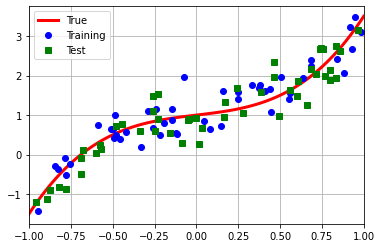

In [14]:
xp = np.linspace(-1,1,100)
yp = poly.polyval(xp,beta)
plt.xlim(-1,1)
plt.plot(xp,yp,'r-',linewidth=3)

# Plot data
plt.plot(xtr,ytr,'bo')
plt.plot(xts,yts,'gs')
plt.grid()
plt.legend(['True','Training','Test'],loc='upper left')

Using the train_test_split built-in function in sklearn helps in shuffling the data before splitting it.

In [15]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(xdat, ydat, test_size=0.5)

Performing Cross Validation for each model order d

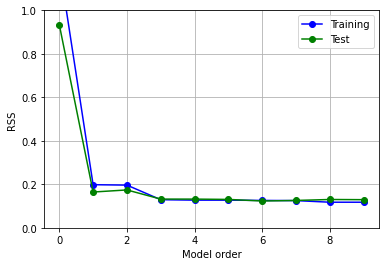

In [16]:
dtest = np.array(range(0,10))
RSStest = []
RSStr = []
for d in dtest:
    
    # Fit data
    beta_hat = poly.polyfit(xtr,ytr,d)
    
    # Measure RSS on training data
    # This is not necessary, but we do it just to show the training error
    yhat = poly.polyval(xtr,beta_hat)
    RSSd = np.mean((yhat-ytr)**2)
    RSStr.append(RSSd)
    
    # Measure RSS on test data
    yhat = poly.polyval(xts,beta_hat)
    RSSd = np.mean((yhat-yts)**2)
    RSStest.append(RSSd)
    
plt.plot(dtest,RSStr,'bo-')
plt.plot(dtest,RSStest,'go-')
plt.xlabel('Model order')
plt.ylabel('RSS')
plt.grid()
plt.ylim(0,1)
plt.legend(['Training','Test'],loc='upper right')

Selecting model order from minimum RSS on test data

In [17]:
imin = np.argmin(RSStest)
print("Estimated model order= {0:d}".format(dtest[imin]))

Estimated model order= 6


**K-Fold Validation**

This type of validation is used when only a small number of samples are available and model order selection depends heavily on particular samples used for training

In [19]:
import  sklearn.model_selection

Running model validation

In [20]:
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# Model orders to be tested
dtest = np.arange(0,10)
nd = len(dtest)

RSSts = np.zeros((nd,nfold))

# Loop over the folds
for isplit, Ind in enumerate(kf.split(xdat)):
        
    # Get the training data in the split
    Itr, Its = Ind 
    #kf.split( ) returns Ind, which contains the indices to the training and testing data for each fold 
    xtr = xdat[Itr]
    ytr = ydat[Itr]
    xts = xdat[Its]
    yts = ydat[Its]
    
    # Loop over the model order
    for it, d in enumerate(dtest):
    
        # Fit data on training data
        beta_hat = poly.polyfit(xtr,ytr,d)
        
        # Measure RSS on test data
        yhat = poly.polyval(xts,beta_hat)
        RSSts[it,isplit] = np.mean((yhat-yts)**2)

Computing mean and standard error of RSS over the folds for each model order

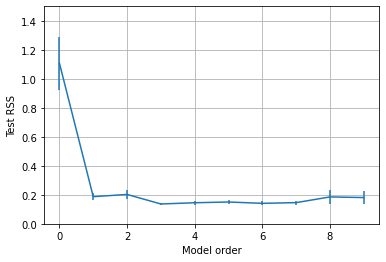

In [21]:
RSS_mean = np.mean(RSSts,axis=1) #note mean is taken over the second dimension, i.e. all folds for the same model order
RSS_std  = np.std(RSSts,axis=1)/np.sqrt(nfold-1)
plt.errorbar(dtest, RSS_mean, yerr=RSS_std, fmt='-')
plt.ylim(0,1.5)
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

Selecting model order that achieves minimum RSS

In [22]:
imin = np.argmin(RSS_mean)
print("The selected model order is {0:d}".format(dtest[imin]))

The selected model order is 3


Using the one SE rule, a model with order that is not too high can be selected

The estimated model order is 3


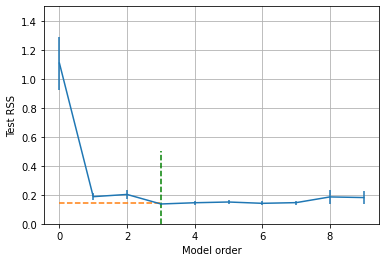

In [23]:
imin = np.argmin(RSS_mean)
RSS_tgt = RSS_mean[imin] + RSS_std[imin]

# Find the lowest model order below the target
I = np.where(RSS_mean <= RSS_tgt)[0]
iopt = I[0]
dopt = dtest[iopt]

plt.errorbar(dtest, RSS_mean, yerr=RSS_std, fmt='-')

# Plot the line at the RSS target
plt.plot([dtest[0],dtest[imin]], [RSS_tgt, RSS_tgt], '--')

# Plot the line at the optimal model order
plt.plot([dopt,dopt], [0,0.5], 'g--')

plt.ylim(0,1.5)
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

# Print results
print("The estimated model order is %d" % dopt)